<a href="https://colab.research.google.com/github/bayuardip/Hello-World/blob/master/StudentScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predict student score based on hour of study 

In [761]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [762]:
df = pd.read_csv("/content/student_scores.csv")

In [763]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [764]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [765]:
df.shape

(25, 2)

In [766]:
df.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [767]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [768]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [769]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [770]:
def comparison (col_name):
  fig, axs = plt.subplots(1,2,figsize=(9,3))
  sns.histplot(data=df,x=col_name,kde=True,ax=axs[0],color="#bc5090")
  sns.boxplot(data=df,x=col_name,ax=axs[1],color="#ffa600")

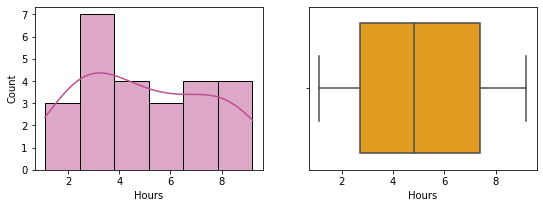

In [771]:
comparison("Hours")

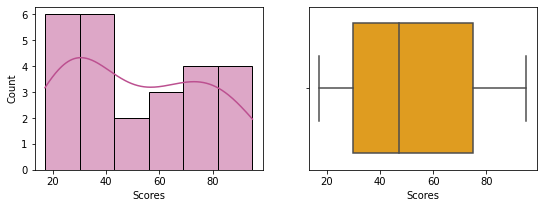

In [772]:
comparison("Scores")

In [773]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


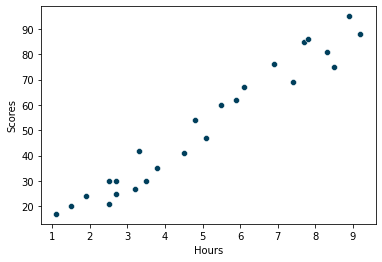

In [774]:
sns.scatterplot(data=df,x="Hours",y="Scores",color="#003f5c")

In [775]:
def get_data(input_data,output_data):
  data_to_input = df[input_data].values.reshape(-1,1)
  data_to_output = df[output_data].values.reshape(-1,1)
  return data_to_input, data_to_output

In [776]:
X, y = get_data("Hours","Scores")

In [777]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [778]:
lin_reg = LinearRegression()
rand_forest = RandomForestRegressor(random_state=0)
grad_boost = GradientBoostingRegressor(random_state=0)

In [779]:
lin_reg.fit(X_train,y_train)
rand_forest.fit(X_train,y_train)
grad_boost.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [780]:
print("Linear Regression")
print(lin_reg.score(X_train,y_train))
print(lin_reg.score(X_test,y_test))
print()
print("Random Forrest Regression")
print(rand_forest.score(X_train,y_train))
print(rand_forest.score(X_test,y_test))
print()
print("Gradient Booster Regression")
print(grad_boost.score(X_train,y_train))
print(grad_boost.score(X_test,y_test))

Linear Regression
0.9491209376364417
0.9678055545167994

Random Forrest Regression
0.9828923361321052
0.9800058081237254

Gradient Booster Regression
0.9989719428885956
0.946452682557495


In [781]:
df["Linear Regression"] =  lin_reg.predict(df["Hours"].values.reshape(-1,1))
df["Random Forrest"] = rand_forest.predict(df["Hours"].values.reshape(-1,1))
df["Gradient Booster"] = grad_boost.predict(df["Hours"].values.reshape(-1,1))

In [782]:
df.head(10)

,Hours,Scores,Linear Regression,Random Forrest,Gradient Booster
0,2.5,21,27.032088,26.942500,27.421442
1,5.1,47,52.205491,49.810000,47.195539
2,3.2,27,33.809542,30.731667,27.128029
3,8.5,75,85.124557,81.690000,75.072994
4,3.5,30,36.714166,33.075000,30.200574
5,1.5,20,17.350010,19.683333,20.024477
6,9.2,88,91.902011,88.560000,88.054960
7,5.5,60,56.078322,57.340000,59.947466
8,8.3,81,83.188141,80.250000,75.072994
9,2.7,25,28.968503,27.932500,27.421442


Text(0.5, 1.0, ' Gradient Booster Pred.')

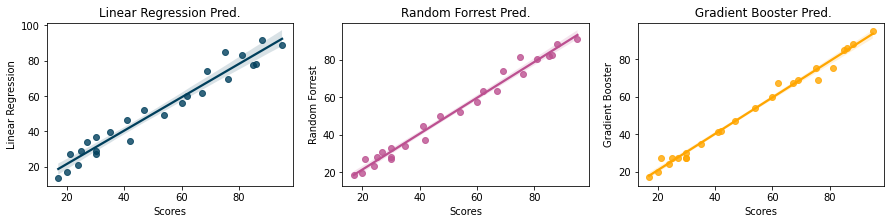

In [783]:
fig,axs = plt.subplots(1,3,figsize=(15,3))
sns.regplot(data=df,x="Scores",y="Linear Regression",ax=axs[0],color="#003f5c").set_title("Linear Regression Pred.")
sns.regplot(data=df,x="Scores",y="Random Forrest",ax=axs[1],color="#bc5090").set_title("Random Forrest Pred.")
sns.regplot(data=df,x="Scores",y="Gradient Booster",ax=axs[2],color="#ffa600").set_title(" Gradient Booster Pred.")

In [784]:
#Mean Absolute Error (MAE Evaluation)
lin_reg_mae = mean_absolute_error(df["Scores"],df["Linear Regression"])
rand_forest_mae = mean_absolute_error(df["Scores"],df["Random Forrest"])
grad_boost_mae = mean_absolute_error(df["Scores"],df["Gradient Booster"])

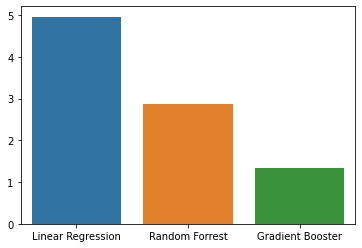

In [785]:
sns.barplot(x=["Linear Regression","Random Forrest","Gradient Booster"],y=[lin_reg_mae,rand_forest_mae,grad_boost_mae])

In [786]:
#Root Mean Square Error (RMSE Evaluation)
lin_reg_rmse = mean_squared_error(df["Scores"],df["Linear Regression"],squared=False)
rand_forest_rmse = mean_squared_error(df["Scores"],df["Random Forrest"],squared=False)
grad_boost_rmse = mean_squared_error(df["Scores"],df["Gradient Booster"],squared=False)

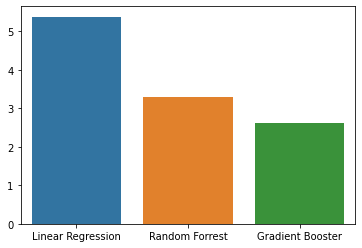

In [787]:
sns.barplot(x=["Linear Regression","Random Forrest","Gradient Booster"],y=[lin_reg_rmse,rand_forest_rmse,grad_boost_rmse])

In [788]:
lin_reg_r2 = r2_score(df["Scores"],df["Linear Regression"])
rand_forest_r2 = r2_score(df["Scores"],df["Random Forrest"])
grad_boost_r2 = r2_score(df["Scores"],df["Gradient Booster"])

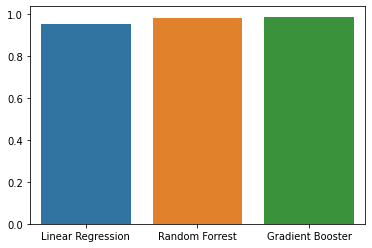

In [789]:
sns.barplot(x=["Linear Regression","Random Forrest","Gradient Booster"],y=[lin_reg_r2,rand_forest_r2,grad_boost_r2])

### **Conclusion**
In this model prediction we are trying 3 types of Algorithm : 


1.   Linear Regression
2.   Random Forrest  
3.   Gradient  Booster   

From the evalution result, model with Gradient Booster algorithm is the best predection model with
prediction score = 94 percent, the lowest MAE score, the lowest RMSE score, and the highest r^2 score





Case  
Andy studying time is 7.5 hours. What score Andy will get ? 
<br>
James studying time is 12 hours. What score James will get ? 


In [791]:
print("Andy's score prediction : ",int(grad_boost.predict([[7.5]])))
print("Jame's score prediction : ",int(grad_boost.predict([[12]])))

Andy's score prediction :  68
Jame's score prediction :  88
